In [1]:
# import library yang akan digunakan
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, classification_report

In [2]:
# atur supaya kolomnya terlihat semua
pd.options.display.max_columns = None

In [3]:
# load dataset
df = pd.read_csv('https://media.githubusercontent.com/media/ivandrian11/dataset/master/loan_data_2007_2014.csv', low_memory=False, index_col=0)

df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# cek informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

Dapat terlihat bahwa banyak sekali kolom yang terdapat pada dataset. Selanjutnya akan disaring kembali kolom yang benar-benar dibutuhkan dengan menghilangkan kolom dengan informasi yang kurang dibutuhkan atau kurang relevan untuk model.

In [5]:
# menghilangkan kolom yang kurang relevan
columns_to_ = ['id', 'member_id', 'sub_grade', 'emp_title', 'url', 'desc', 'title', 'zip_code', 'next_pymnt_d',
                  'recoveries', 'collection_recovery_fee', 'total_rec_prncp', 'total_rec_late_fee', 'desc', 'mths_since_last_record',
                  'mths_since_last_delinq', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint',
                  'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util',
                  'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m','policy_code',]
df.drop(columns=columns_to_, inplace=True, axis=1)

df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000,5000,4975.0,36 months,10.65,162.87,B,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,AZ,27.65,0.0,Jan-85,1.0,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,861.07,Jan-15,171.62,Jan-16,0.0,INDIVIDUAL,0.0,NaN,NaN,NaN
1,2500,2500,2500.0,60 months,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,GA,1.00,0.0,Apr-99,5.0,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,435.17,Apr-13,119.66,Sep-13,0.0,INDIVIDUAL,0.0,NaN,NaN,NaN
2,2400,2400,2400.0,36 months,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,small_business,IL,8.72,0.0,Nov-01,2.0,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,603.65,Jun-14,649.91,Jan-16,0.0,INDIVIDUAL,0.0,NaN,NaN,NaN
3,10000,10000,10000.0,36 months,13.49,339.31,C,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,other,CA,20.00,0.0,Feb-96,1.0,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,2209.33,Jan-15,357.48,Jan-15,0.0,INDIVIDUAL,0.0,NaN,NaN,NaN
4,3000,3000,3000.0,60 months,12.69,67.79,B,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,other,OR,17.94,0.0,Jan-96,0.0,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,1009.07,Jan-16,67.79,Jan-16,0.0,INDIVIDUAL,0.0,NaN,NaN,NaN


Selanjutnya akan dilakukan pengecekan missing value atau nilai yang kosong pada pada tiap kolom.

In [6]:
df.isnull().sum()

loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
emp_length                    21008
home_ownership                    0
annual_inc                        4
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
purpose                           0
addr_state                        0
dti                               0
delinq_2yrs                      29
earliest_cr_line                 29
inq_last_6mths                   29
open_acc                         29
pub_rec                          29
revol_bal                         0
revol_util                      340
total_acc                        29
initial_list_status               0
out_prncp                         0
out_prncp_inv               

> **Pembahasan:**<br>
Dikarenakan dataset yang digunakan tergolong big data dan jumlah missing value tergolong jumlah yang tidak seberapa maka dapat dilakukan penghapusan terhadap missing value tersebut.

In [7]:
# hapus missing value
df.dropna(inplace=True)

df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
42535,27050,27050,27050.0,36 months,10.99,885.46,B,10+ years,OWN,55000.0,Verified,Dec-13,Current,n,debt_consolidation,MI,22.87,0.0,Oct-86,0.0,14.0,0.0,36638,61.2,27.0,w,10018.90,10018.90,21251.04,21251.04,4219.94,Jan-16,885.46,Dec-15,0.0,INDIVIDUAL,0.0,0.0,114834.0,59900.0
42536,9750,9750,9750.0,36 months,13.98,333.14,C,1 year,RENT,26000.0,Not Verified,Dec-13,Current,n,debt_consolidation,CA,25.12,0.0,Jan-07,0.0,12.0,0.0,7967,52.8,28.0,f,3710.96,3710.96,7994.83,7994.83,1955.79,Jan-16,333.14,Jan-16,0.0,INDIVIDUAL,0.0,0.0,14123.0,15100.0
42537,12000,12000,12000.0,36 months,6.62,368.45,A,10+ years,MORTGAGE,105000.0,Not Verified,Dec-13,Current,n,debt_consolidation,CT,14.05,0.0,Mar-94,1.0,12.0,0.0,13168,21.6,22.0,w,4266.62,4266.62,8842.80,8842.80,1109.42,Jan-16,368.45,Jan-16,0.0,INDIVIDUAL,0.0,0.0,267646.0,61100.0
42538,12000,12000,12000.0,36 months,13.53,407.40,B,10+ years,RENT,40000.0,Source Verified,Dec-13,Fully Paid,n,debt_consolidation,NM,16.94,0.0,Oct-98,0.0,7.0,2.0,5572,68.8,32.0,w,0.00,0.00,13359.77,13359.77,1359.78,Sep-15,119.17,Jan-16,0.0,INDIVIDUAL,0.0,15386.0,13605.0,8100.0
42539,15000,15000,15000.0,36 months,8.90,476.30,A,2 years,MORTGAGE,63000.0,Not Verified,Dec-13,Current,n,debt_consolidation,FL,16.51,0.0,Mar-98,0.0,8.0,0.0,11431,74.2,29.0,w,5449.27,5449.27,11431.20,11431.20,1880.47,Jan-16,476.30,Jan-16,0.0,INDIVIDUAL,0.0,1514.0,272492.0,15400.0


In [8]:
# cek informasi dataset kembali
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 376571 entries, 42535 to 466284
Data columns (total 40 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   376571 non-null  int64  
 1   funded_amnt                 376571 non-null  int64  
 2   funded_amnt_inv             376571 non-null  float64
 3   term                        376571 non-null  object 
 4   int_rate                    376571 non-null  float64
 5   installment                 376571 non-null  float64
 6   grade                       376571 non-null  object 
 7   emp_length                  376571 non-null  object 
 8   home_ownership              376571 non-null  object 
 9   annual_inc                  376571 non-null  float64
 10  verification_status         376571 non-null  object 
 11  issue_d                     376571 non-null  object 
 12  loan_status                 376571 non-null  object 
 13  pymnt_plan

Selanjutnya akan dilakukan eksplorasi data dengan melihat korelasi antar fitur. Dari korelasi ini dapat dilihat juga jika terdapat fitur collinear. Fitur collinear merupakan fitur yang sangat berkorelasi satu sama lain. Dalam Machine Learning, fitur tersebut dapat menyebabkan penurunan kinerja generalisasi karena memiliki nilai variance yang cukup tinggi dan interpretasi model yang lebih sedikit.

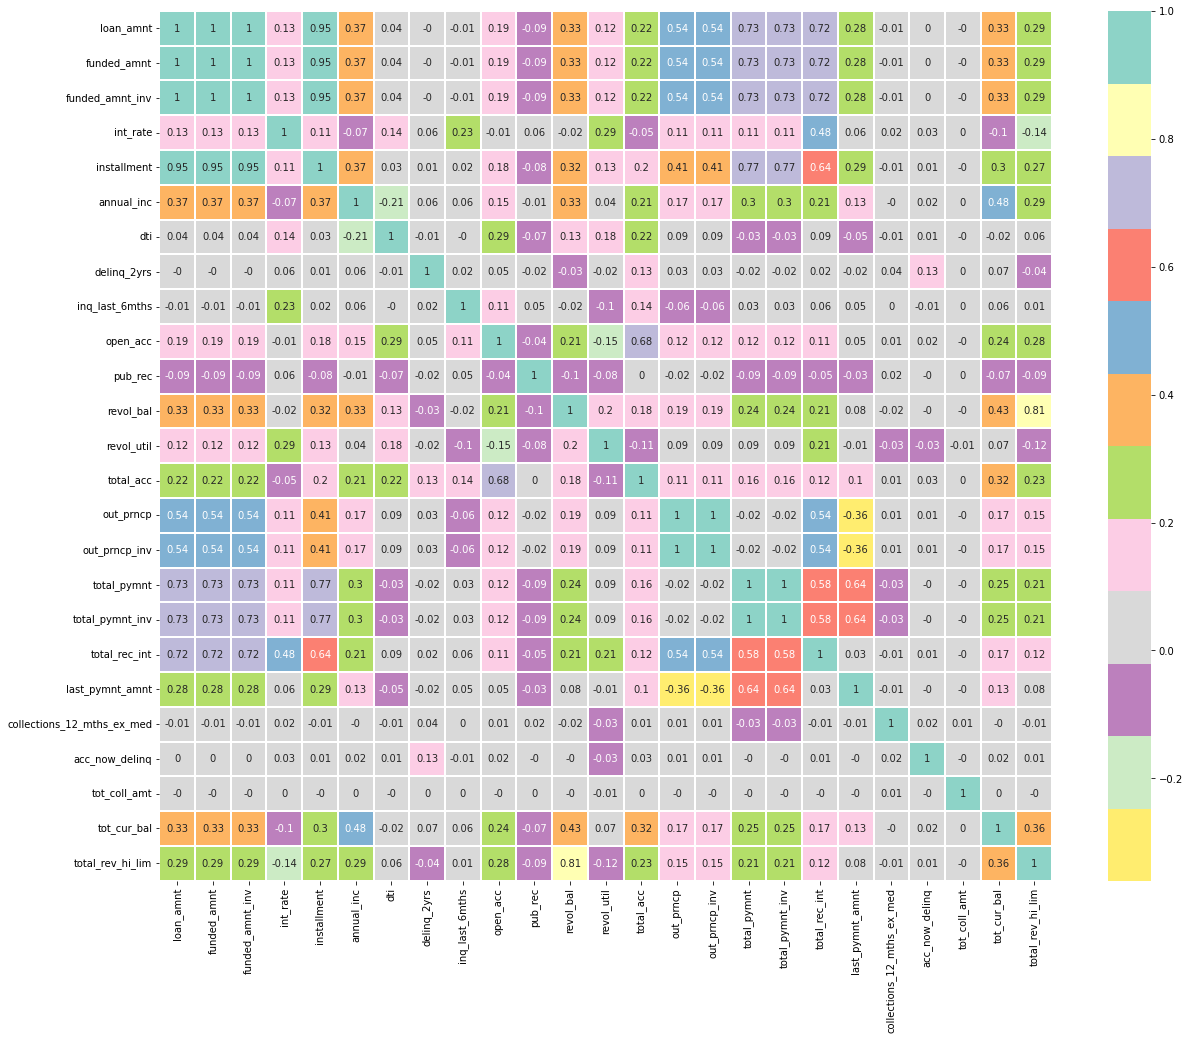

In [9]:
plt.figure(figsize=(20, 16))
correlation_matrix = df.corr().round(2)
 
sns.heatmap(data=correlation_matrix, annot=True, cmap='Set3_r', linewidths=1)
plt.show()

In [10]:
# fungsi untuk mencari fitur collinear
def check_collinear_features(dataset, threshold):
  col_corr = set()
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j]) > threshold:
        colname = corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr

collinear_features = check_collinear_features(df, 0.8)

collinear_features

{'funded_amnt',
 'funded_amnt_inv',
 'installment',
 'out_prncp_inv',
 'total_pymnt_inv',
 'total_rev_hi_lim'}

> **Pembahasan:**<br>
Fitur collinear tersebut akan dihapus menjelang pemodelan nantinya.

Selanjutnya akan dilakukan preprocessing terhadap beberapa kolom sehingga dapat memberikan informasi yang berguna untuk model.

In [11]:
# fungsi untuk mengonversi data kolom term
def term_convert(data, col):
    data[col] = pd.to_numeric(data[col].str.replace(' months', ''))
    
term_convert(df, 'term')

# fungsi untuk mengonversi data kolom emp_length
def emp_length_convert(data, col):
    data[col] = data[col].str.replace('\+ years', '')
    data[col] = data[col].str.replace('< 1 year', str(0))
    data[col] = data[col].str.replace('n/a', str(0))
    data[col] = data[col].str.replace(' years', '')
    data[col] = data[col].str.replace(' year', '')
    data[col] = pd.to_numeric(data[col])
    data[col].fillna(value = 0, inplace = True)

emp_length_convert(df, 'emp_length')

# fungsi untuk mengonversi data kolom yang berkaitan dengan tanggal
def date_columns_convert(data, col):
    today_date = pd.to_datetime('2022-05-14')
    data[col] = pd.to_datetime(data[col], format = "%b-%y")
    data['mths_since_' + col] = round(pd.to_numeric((today_date - data[col]) / np.timedelta64(1, 'M')))
    data['mths_since_' + col] = data['mths_since_' + col].apply(lambda x: data['mths_since_' + col].max() if x < 0 else x)
    data.drop(columns = [col], inplace = True)

date_columns_convert(df, 'issue_d')
date_columns_convert(df, 'earliest_cr_line')
date_columns_convert(df, 'last_pymnt_d')
date_columns_convert(df, 'last_credit_pull_d')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  import sys


Pada dataset terdapat target atau label yang menjadi output dari dataset ini yaitu `loan_status`. Terdapat beberapa kategori yang menjadi nilai unik dari label tersebut yang akan diubah menjadi bentuk biner. Di mana nilai `0` untuk peminjam yang buruk dan `1` untuk peminjam yang baik. Peminjam yang buruk didasarkan dari kategori `Charged Off`, `Default`, dan `Late (31-120 days)`. Kategori lainnya akan dianggap sebagai peminjam yang baik.

In [12]:
df.loan_status.value_counts()

Current               208934
Fully Paid            126102
Charged Off            30291
Late (31-120 days)      6376
In Grace Period         2978
Late (16-30 days)       1123
Default                  767
Name: loan_status, dtype: int64

In [13]:
# buat label yang menyimpan nilai biner
df['label'] = np.where(df.loc[:, 'loan_status'].isin(['Charged Off', 'Default', 'Late (31-120 days)']), 0, 1)

# hapus label yang sebelumnya
df.drop(columns = ['loan_status'], inplace = True)

df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_int,last_pymnt_amnt,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,mths_since_issue_d,mths_since_earliest_cr_line,mths_since_last_pymnt_d,mths_since_last_credit_pull_d,label
42535,27050,27050,27050.0,36,10.99,885.46,B,10,OWN,55000.0,Verified,n,debt_consolidation,MI,22.87,0.0,0.0,14.0,0.0,36638,61.2,27.0,w,10018.90,10018.90,21251.04,21251.04,4219.94,885.46,0.0,INDIVIDUAL,0.0,0.0,114834.0,59900.0,101.0,427.0,76.0,77.0,1
42536,9750,9750,9750.0,36,13.98,333.14,C,1,RENT,26000.0,Not Verified,n,debt_consolidation,CA,25.12,0.0,0.0,12.0,0.0,7967,52.8,28.0,f,3710.96,3710.96,7994.83,7994.83,1955.79,333.14,0.0,INDIVIDUAL,0.0,0.0,14123.0,15100.0,101.0,184.0,76.0,76.0,1
42537,12000,12000,12000.0,36,6.62,368.45,A,10,MORTGAGE,105000.0,Not Verified,n,debt_consolidation,CT,14.05,0.0,1.0,12.0,0.0,13168,21.6,22.0,w,4266.62,4266.62,8842.80,8842.80,1109.42,368.45,0.0,INDIVIDUAL,0.0,0.0,267646.0,61100.0,101.0,338.0,76.0,76.0,1
42538,12000,12000,12000.0,36,13.53,407.40,B,10,RENT,40000.0,Source Verified,n,debt_consolidation,NM,16.94,0.0,0.0,7.0,2.0,5572,68.8,32.0,w,0.00,0.00,13359.77,13359.77,1359.78,119.17,0.0,INDIVIDUAL,0.0,15386.0,13605.0,8100.0,101.0,283.0,80.0,76.0,1
42539,15000,15000,15000.0,36,8.90,476.30,A,2,MORTGAGE,63000.0,Not Verified,n,debt_consolidation,FL,16.51,0.0,0.0,8.0,0.0,11431,74.2,29.0,w,5449.27,5449.27,11431.20,11431.20,1880.47,476.30,0.0,INDIVIDUAL,0.0,1514.0,272492.0,15400.0,101.0,290.0,76.0,76.0,1


In [14]:
# cek jumlah masing-masing label yang telah terkonversi
df.label.value_counts()

1    339137
0     37434
Name: label, dtype: int64

> **Pembahasan:**<br>
Perbedaan dari kedua nilai biner dapat dikatakan sebagai inbalanced data. Untuk mengatasinya akan dicoba menggunakan salah satu algoritma data sampling yaitu SMOTE. Sehingga pada pemodelan nanti akan diuji yang menggunakan SMOTE dengan yang tidak.

Terakhir akan dilakukan preprocessing untuk data kategorikal menggunakan Label Encoder karena fitur kategorikal yang ada dapat dikatakan sebagai ordinal data.

In [15]:
cat_col = df.select_dtypes('object').columns
for i in range(len(cat_col)):
  le = LabelEncoder()
  df[cat_col[i]] = le.fit_transform(df[cat_col[i]]) 

df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_int,last_pymnt_amnt,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,mths_since_issue_d,mths_since_earliest_cr_line,mths_since_last_pymnt_d,mths_since_last_credit_pull_d,label
42535,27050,27050,27050.0,36,10.99,885.46,1,10,4,55000.0,2,0,2,22,22.87,0.0,0.0,14.0,0.0,36638,61.2,27.0,1,10018.90,10018.90,21251.04,21251.04,4219.94,885.46,0.0,0,0.0,0.0,114834.0,59900.0,101.0,427.0,76.0,77.0,1
42536,9750,9750,9750.0,36,13.98,333.14,2,1,5,26000.0,0,0,2,4,25.12,0.0,0.0,12.0,0.0,7967,52.8,28.0,0,3710.96,3710.96,7994.83,7994.83,1955.79,333.14,0.0,0,0.0,0.0,14123.0,15100.0,101.0,184.0,76.0,76.0,1
42537,12000,12000,12000.0,36,6.62,368.45,0,10,1,105000.0,0,0,2,6,14.05,0.0,1.0,12.0,0.0,13168,21.6,22.0,1,4266.62,4266.62,8842.80,8842.80,1109.42,368.45,0.0,0,0.0,0.0,267646.0,61100.0,101.0,338.0,76.0,76.0,1
42538,12000,12000,12000.0,36,13.53,407.40,1,10,5,40000.0,1,0,2,31,16.94,0.0,0.0,7.0,2.0,5572,68.8,32.0,1,0.00,0.00,13359.77,13359.77,1359.78,119.17,0.0,0,0.0,15386.0,13605.0,8100.0,101.0,283.0,80.0,76.0,1
42539,15000,15000,15000.0,36,8.90,476.30,0,2,1,63000.0,0,0,2,9,16.51,0.0,0.0,8.0,0.0,11431,74.2,29.0,1,5449.27,5449.27,11431.20,11431.20,1880.47,476.30,0.0,0,0.0,1514.0,272492.0,15400.0,101.0,290.0,76.0,76.0,1


In [16]:
# pembagian fitur dan label
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [17]:
# menghapus fitur collinear
x.drop(collinear_features, axis=1, inplace=True)

x.head()

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_int,last_pymnt_amnt,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,mths_since_issue_d,mths_since_earliest_cr_line,mths_since_last_pymnt_d,mths_since_last_credit_pull_d
42535,27050,36,10.99,1,10,4,55000.0,2,0,2,22,22.87,0.0,0.0,14.0,0.0,36638,61.2,27.0,1,10018.90,21251.04,4219.94,885.46,0.0,0,0.0,0.0,114834.0,101.0,427.0,76.0,77.0
42536,9750,36,13.98,2,1,5,26000.0,0,0,2,4,25.12,0.0,0.0,12.0,0.0,7967,52.8,28.0,0,3710.96,7994.83,1955.79,333.14,0.0,0,0.0,0.0,14123.0,101.0,184.0,76.0,76.0
42537,12000,36,6.62,0,10,1,105000.0,0,0,2,6,14.05,0.0,1.0,12.0,0.0,13168,21.6,22.0,1,4266.62,8842.80,1109.42,368.45,0.0,0,0.0,0.0,267646.0,101.0,338.0,76.0,76.0
42538,12000,36,13.53,1,10,5,40000.0,1,0,2,31,16.94,0.0,0.0,7.0,2.0,5572,68.8,32.0,1,0.00,13359.77,1359.78,119.17,0.0,0,0.0,15386.0,13605.0,101.0,283.0,80.0,76.0
42539,15000,36,8.90,0,2,1,63000.0,0,0,2,9,16.51,0.0,0.0,8.0,0.0,11431,74.2,29.0,1,5449.27,11431.20,1880.47,476.30,0.0,0,0.0,1514.0,272492.0,101.0,290.0,76.0,76.0


In [18]:
# membagi data training dan testing
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42)

In [19]:
# melakukan standardisasi untuk menyamakan skala data.
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [20]:
# fungsi untuk membuat model
def modeling(x_train, y_train, x_test, y_test):
  models = []
  models.append(('LR', LogisticRegression(solver='liblinear', max_iter=100000)))
  models.append(('KNN', KNeighborsClassifier()))
  models.append(('DT', DecisionTreeClassifier()))
  models.append(('NB', GaussianNB()))
  models.append(('RF', RandomForestClassifier()))

  acc = pd.DataFrame(columns=['test'], index=['LR','KNN','DT', 'NB', 'RF'])

  for name, model in models:
    print(name)
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    acc.loc[name, 'test'] = accuracy_score(y_true=y_test, y_pred=predictions)
    print(classification_report(y_true=y_test, y_pred=predictions))

  fig, ax = plt.subplots(figsize=(8,6))
  acc.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
  ax.grid(zorder=0)

LR
              precision    recall  f1-score   support

           0       0.98      0.81      0.89      7450
           1       0.98      1.00      0.99     67865

    accuracy                           0.98     75315
   macro avg       0.98      0.90      0.94     75315
weighted avg       0.98      0.98      0.98     75315

KNN
              precision    recall  f1-score   support

           0       0.88      0.50      0.64      7450
           1       0.95      0.99      0.97     67865

    accuracy                           0.94     75315
   macro avg       0.92      0.74      0.80     75315
weighted avg       0.94      0.94      0.94     75315

DT
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      7450
           1       0.99      0.99      0.99     67865

    accuracy                           0.99     75315
   macro avg       0.97      0.97      0.97     75315
weighted avg       0.99      0.99      0.99     75315

NB
      

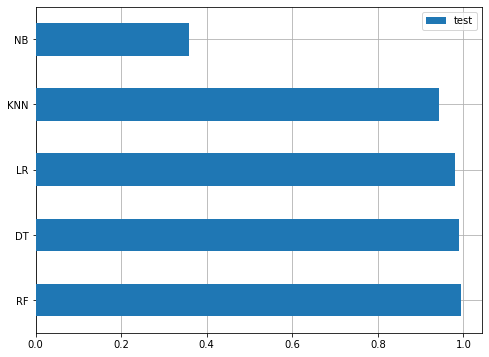

In [21]:
# model tanpa SMOTE
modeling(x_train, y_train, x_test, y_test)

>**Pembahasan:** <br>
Seperti yang dapat dilihat dari hasil di atas, model Tree berkinerja jauh lebih baik dibanding model yang lain. Memang, algoritma berbasis Tree menawarkan stabilitas dan kemampuan interpretasi yang tinggi untuk prediksi pemodelan. Algoritma tersebut memetakan interaksi nonlinier dengan cukup baik, tidak seperti model linier. Algoritma tersebut dapat beradaptasi dengan situasi apa pun dan memecahkan tantangan apa pun (klasifikasi atau regresi).

Selanjutnya dilakukan pemodelan menggunakan data sampling SMOTE.

In [22]:
print("Sebelum OverSampling, jumlah label '1': {}".format(sum(y_train == 1)))
print("Sebelum OverSampling, jumlah label '0': {} \n".format(sum(y_train == 0)))

print('Sebelum OverSampling, ukuran train_X: {}'.format(x_train.shape))
print('Sebelum OverSampling, ukuran train_y: {} \n'.format(y_train.shape))

sm = SMOTE(random_state = 42)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train)

print('Sesudah OverSampling, ukuran train_X: {}'.format(x_train_res.shape))
print('Sesudah OverSampling, ukuran train_y: {} \n'.format(y_train_res.shape))

print("Sesudah OverSampling, jumlah label '1': {}".format(sum(y_train_res == 1)))
print("Sesudah OverSampling, jumlah label '0': {}".format(sum(y_train_res == 0)))

Sebelum OverSampling, jumlah label '1': 271272
Sebelum OverSampling, jumlah label '0': 29984 

Sebelum OverSampling, ukuran train_X: (301256, 33)
Sebelum OverSampling, ukuran train_y: (301256,) 

Sesudah OverSampling, ukuran train_X: (542544, 33)
Sesudah OverSampling, ukuran train_y: (542544,) 

Sesudah OverSampling, jumlah label '1': 271272
Sesudah OverSampling, jumlah label '0': 271272


LR
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      7450
           1       0.99      0.98      0.99     67865

    accuracy                           0.97     75315
   macro avg       0.92      0.93      0.93     75315
weighted avg       0.97      0.97      0.97     75315

KNN
              precision    recall  f1-score   support

           0       0.37      0.77      0.50      7450
           1       0.97      0.86      0.91     67865

    accuracy                           0.85     75315
   macro avg       0.67      0.81      0.70     75315
weighted avg       0.91      0.85      0.87     75315

DT
              precision    recall  f1-score   support

           0       0.92      0.95      0.93      7450
           1       0.99      0.99      0.99     67865

    accuracy                           0.99     75315
   macro avg       0.96      0.97      0.96     75315
weighted avg       0.99      0.99      0.99     75315

NB
      

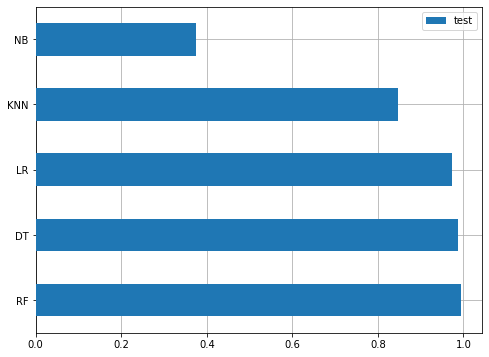

In [23]:
# model dengan SMOTE
modeling(x_train_res, y_train_res, x_test, y_test)

>**Pembahasan:** <br>
Hasilnya tidak berbeda secara signifikan ya bahkan memang sedikit lebih baik akurasi dari pemodelan tanpa data samping.